In [78]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [79]:
!mkdir data/
!wget https://raw.githubusercontent.com/VidhishaAgarwal/Cl653/main/final_data.csv

mkdir: cannot create directory ‘data/’: File exists
--2024-04-25 17:52:16--  https://raw.githubusercontent.com/VidhishaAgarwal/Cl653/main/final_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117900 (115K) [text/plain]
Saving to: ‘final_data.csv.5’

final_data.csv.5    100%[===================>] 115.14K  --.-KB/s    in 0.01s   

2024-04-25 17:52:16 (8.80 MB/s) - ‘final_data.csv.5’ saved [117900/117900]



In [80]:
# Load the data
vidhi_df = pd.read_csv('final_data.csv')

In [81]:
# Analyze null values
null_values = vidhi_df.isnull().sum()
print("Null values in each column:")
print(null_values)

# Replace null values with the mean of the data
vidhi_df.fillna(vidhi_df.mean(), inplace=True)

# Check if null values have been replaced
null_values_after_fillna = vidhi_df.isnull().sum()
print("\nNull values after replacing with the mean:")
print(null_values_after_fillna)



Null values in each column:
Fuel [kg/s]          0
Air [kg/s]           0
Air [C]              0
Catalyst_Porosity    0
O2 [%]               0
Fuel_outlet_temp     0
dtype: int64

Null values after replacing with the mean:
Fuel [kg/s]          0
Air [kg/s]           0
Air [C]              0
Catalyst_Porosity    0
O2 [%]               0
Fuel_outlet_temp     0
dtype: int64


In [82]:


# Calculate Z-scores for each column
z_scores = stats.zscore(vidhi_df)

# Define a threshold to identify outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Find and remove rows containing outliers
vidhi_df_no_outliers = vidhi_df[(z_scores < threshold).all(axis=1)]

# Print the number of rows removed
print("Number of rows removed:", len(vidhi_df) - len(vidhi_df_no_outliers))

vidhi_df=vidhi_df_no_outliers


Number of rows removed: 2


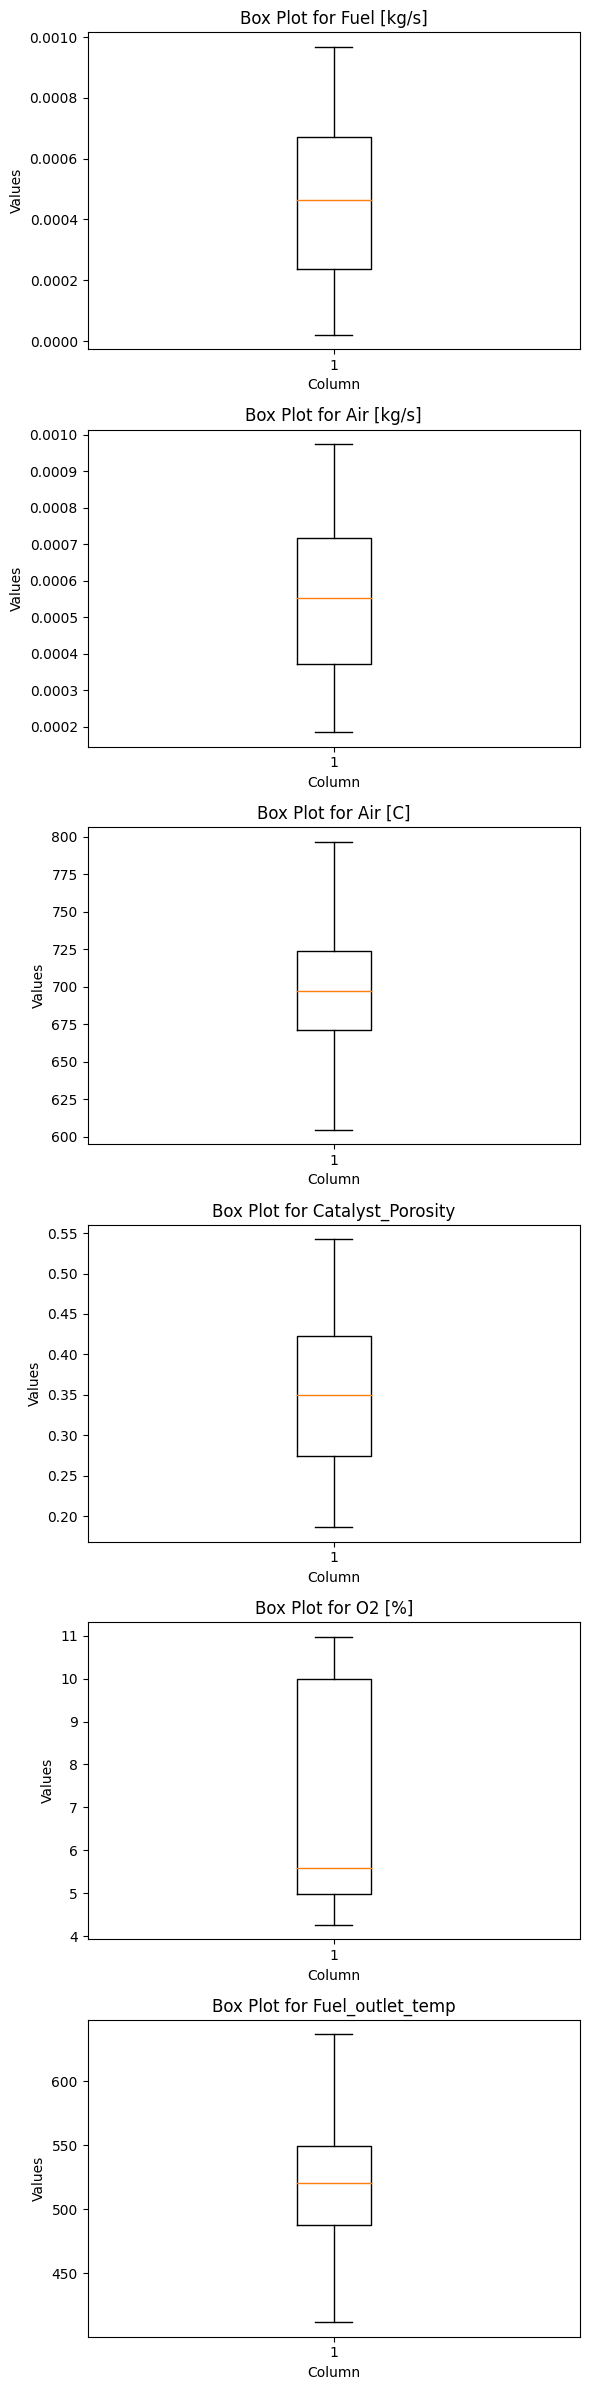

In [83]:
# Plot box plots for each column in subplots
fig, axes = plt.subplots(nrows=len(vidhi_df.columns), ncols=1, figsize=(6, 4 * len(vidhi_df.columns)))

for i, column in enumerate(vidhi_df.columns):
    axes[i].boxplot(vidhi_df[column])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('Column')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

In [84]:
vidhi_df.corr()

,Fuel [kg/s],Air [kg/s],Air [C],Catalyst_Porosity,O2 [%],Fuel_outlet_temp
Fuel [kg/s],1.000000,0.990074,0.631576,0.982777,0.858010,0.848502
Air [kg/s],0.990074,1.000000,0.626432,0.980007,0.855210,0.845555
Air [C],0.631576,0.626432,1.000000,0.618578,0.528282,0.534126
Catalyst_Porosity,0.982777,0.980007,0.618578,1.000000,0.848984,0.838646
O2 [%],0.858010,0.855210,0.528282,0.848984,1.000000,0.725699
Fuel_outlet_temp,0.848502,0.845555,0.534126,0.838646,0.725699,1.000000


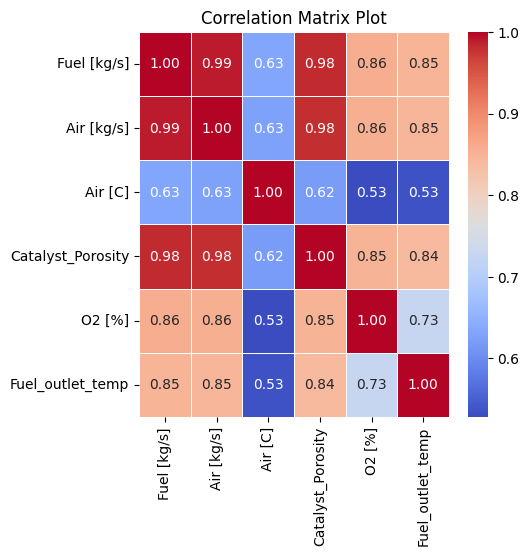

In [85]:
correlation_matrix = vidhi_df.corr()
# Creating a heatmap using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Plot')
plt.savefig('corr matrix.png')
plt.show()

In [86]:
# Separate features and target variable
X = vidhi_df.drop(columns=['Fuel_outlet_temp'])  # Features
y = vidhi_df['Fuel_outlet_temp']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


## SVM Model (without Hyperparameter Tuning)


Performance Metrics:
Mean Squared Error: 568.1525060830477
Root Mean Squared Error: 23.835949867438632
R-squared: 0.6748379671041964


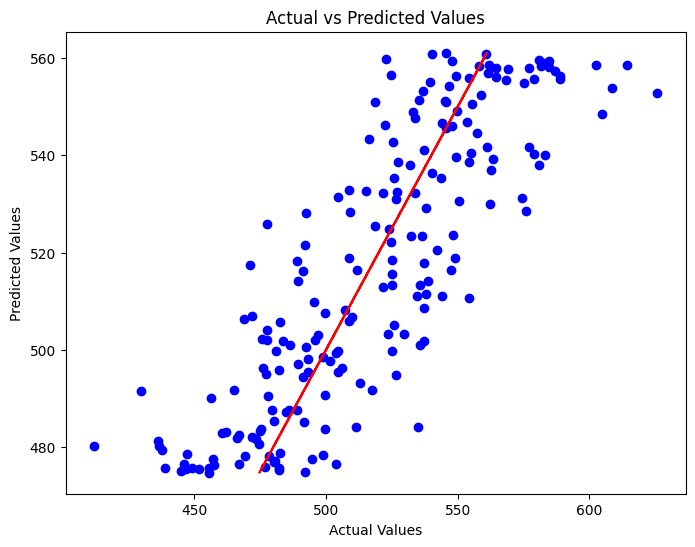

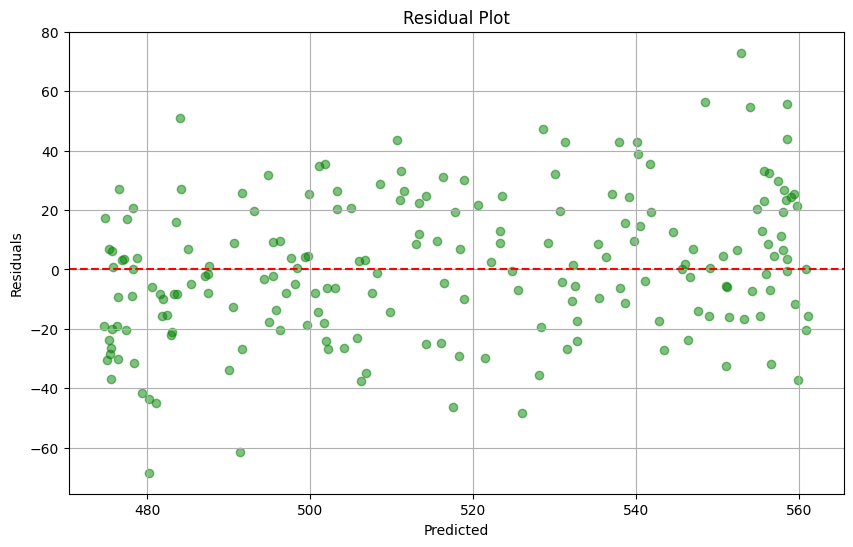

In [88]:

# Initialize the SVM model
svm = SVR(kernel='rbf')

# Train the SVM model
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nPerformance Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, y_pred, color='red', label='Predicted (line)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('svm1.png')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('svm2.png')
plt.show()


## SVM Model (with Hyperparameter Tuning)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.

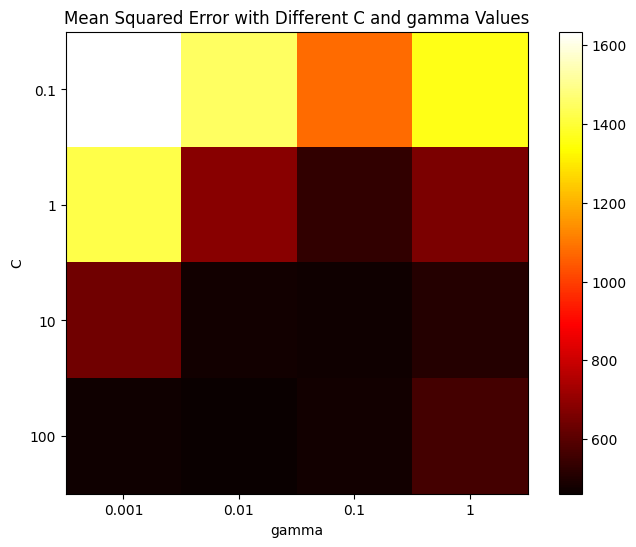


Performance Metrics:
Mean Squared Error: 513.715290733188
Root Mean Squared Error: 22.665288234063734
R-squared: 0.7059931858506217


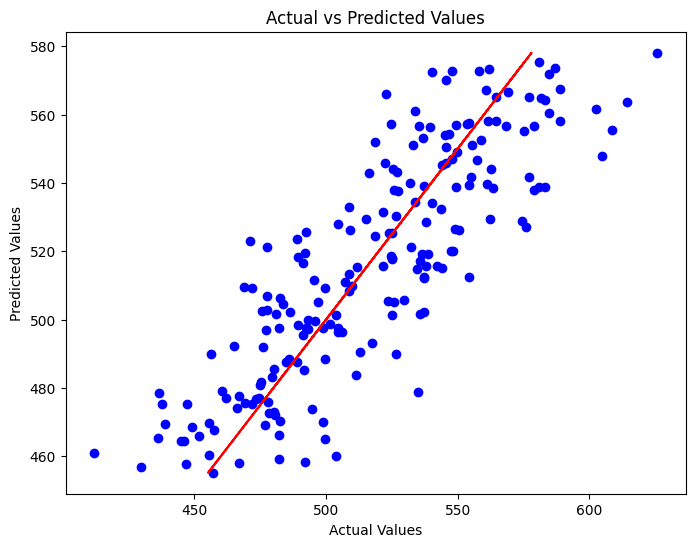

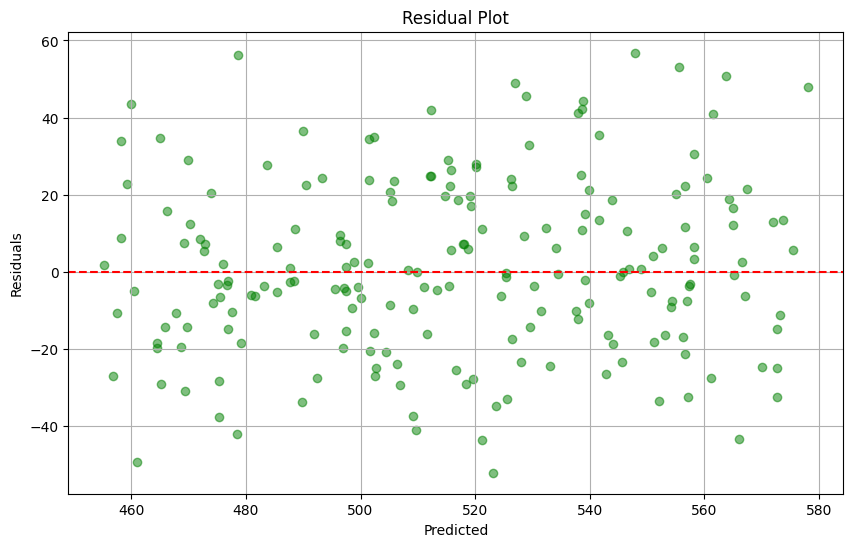

In [89]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
}

# Initialize the SVM model
svm = SVR(kernel='rbf')

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (negative MSE):", best_score)

# Plot the effect of hyperparameters on performance
results = grid_search.cv_results_
C_values = param_grid['C']
gamma_values = param_grid['gamma']
mse_values = -results['mean_test_score'].reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(8, 6))
plt.imshow(mse_values, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(range(len(gamma_values)), gamma_values)
plt.yticks(range(len(C_values)), C_values)
plt.title('Mean Squared Error with Different C and gamma Values')
plt.savefig('svm3.png')
plt.show()

# Initialize and train the SVM model with the best parameters
best_svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nPerformance Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, y_pred, color='red', label='Predicted (line)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('svm4.png')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('svm5.png')
plt.show()


## KNN Regression model without hyperparameter tuning


Performance Metrics:
Mean Squared Error: 638.365824434622
Root Mean Squared Error: 25.265902406892614
R-squared: 0.6346538526505661


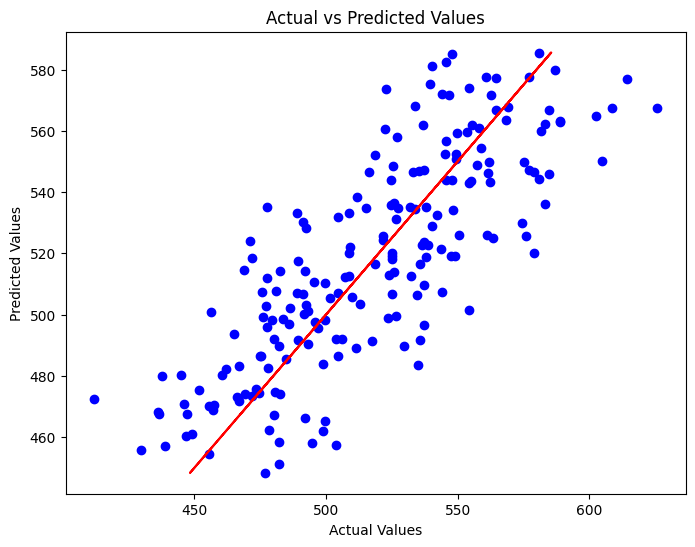

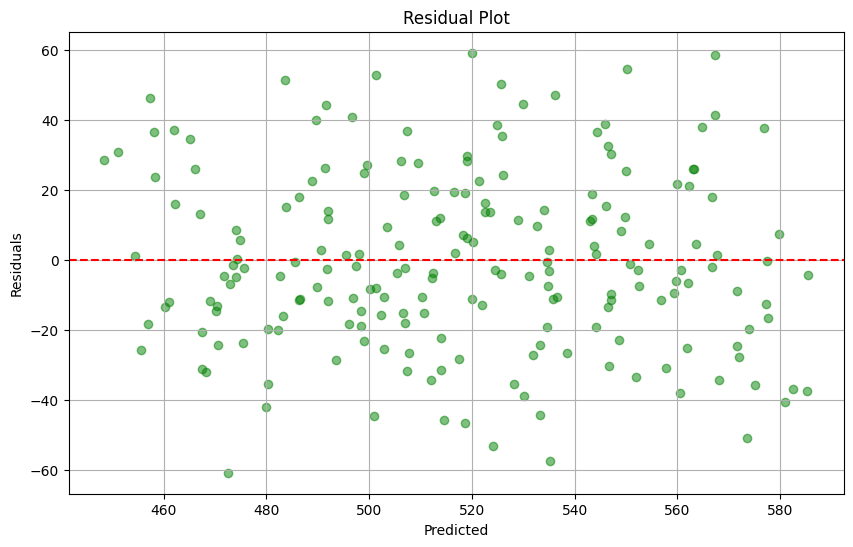

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the KNN model
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# Train the model
knn.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_normalized)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nPerformance Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, y_pred, color='red', label='Predicted (line)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('knn1.png')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('knn2.png')
plt.show()


## KNN regression Model with hyperparameter tuning

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weig

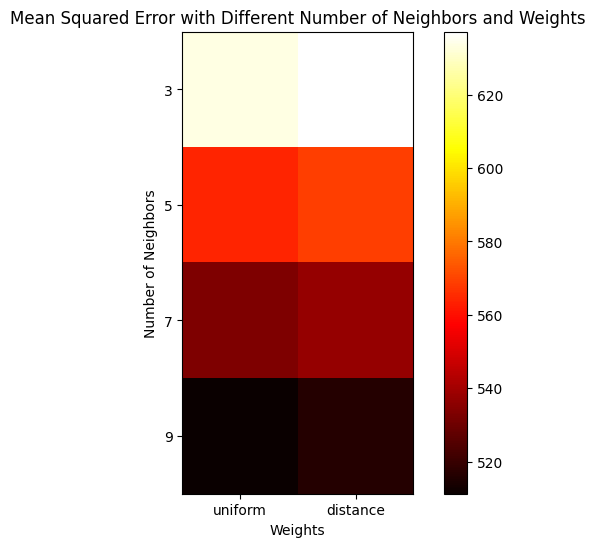


Performance Metrics:
Mean Squared Error: 599.0776719042998
Root Mean Squared Error: 24.476063243591682
R-squared: 0.6571390400055482


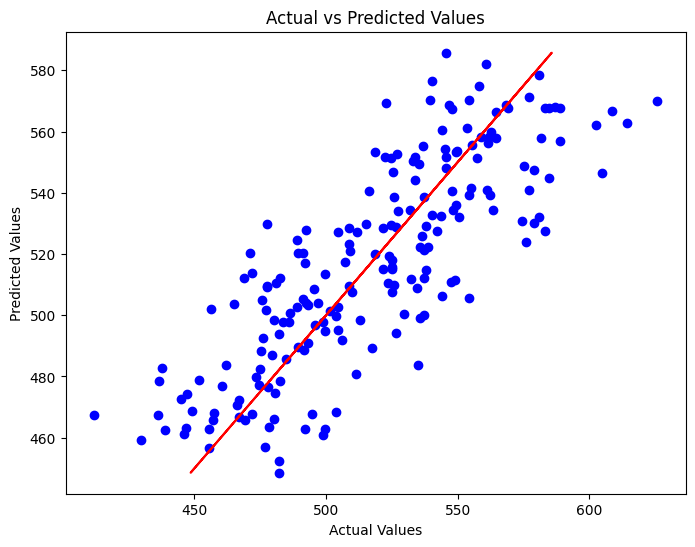

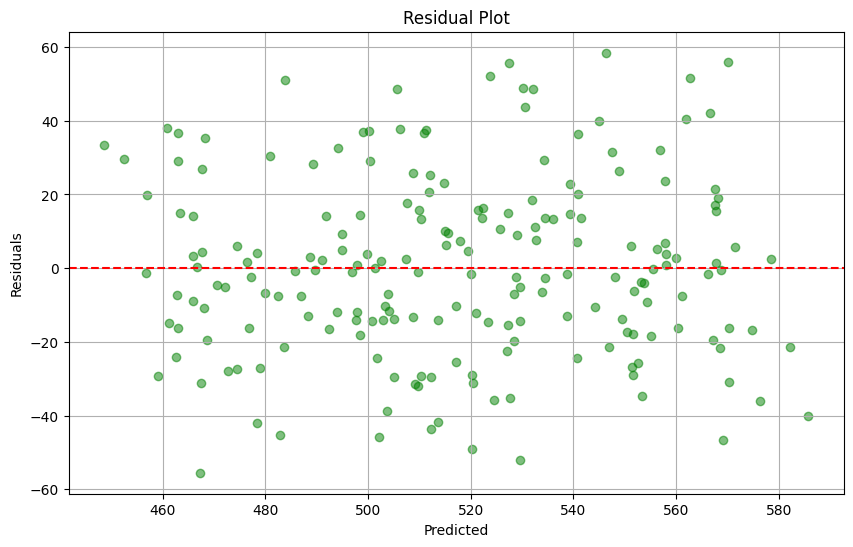

In [91]:

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (negative MSE):", best_score)

# Plot the effect of hyperparameters on performance
results = grid_search.cv_results_
n_neighbors_values = param_grid['n_neighbors']
mse_values = -results['mean_test_score'].reshape(len(n_neighbors_values), len(param_grid['weights']))

plt.figure(figsize=(8, 6))
plt.imshow(mse_values, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['weights'])), param_grid['weights'])
plt.yticks(np.arange(len(n_neighbors_values)), n_neighbors_values)
plt.title('Mean Squared Error with Different Number of Neighbors and Weights')
plt.savefig('knn3.png')
plt.show()

# Initialize and train the KNN model with the best parameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn_model.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_normalized)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nPerformance Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, y_pred, color='red', label='Predicted (line)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('knn4.png')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('knn5.png')
plt.show()

## Multi Regression Model without Hyperparameter tuning

Multi Regression Equation:
y = (83833.77 * X_1) + (55126.98 * X_2) + (-0.01 * X_3) + (34.28 * X_4) + (-0.47 * X_5) + 451.31

Performance Metrics:
Mean Squared Error: 507.25377053499346
Root Mean Squared Error: 22.522294965988557
R-squared: 0.7096912088651239


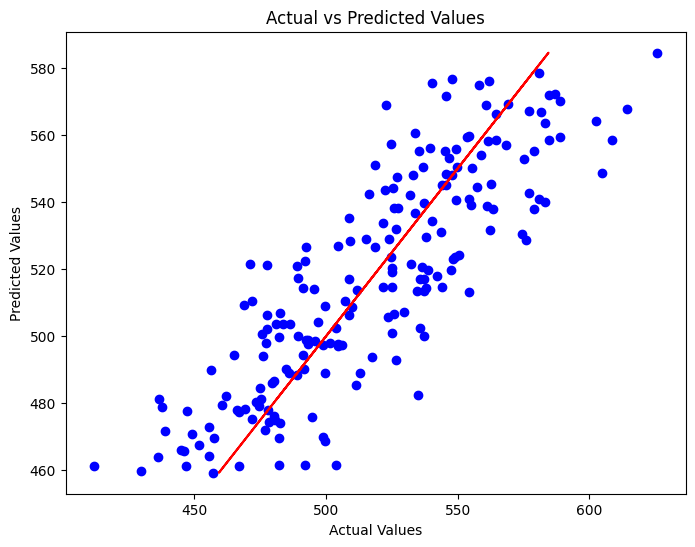

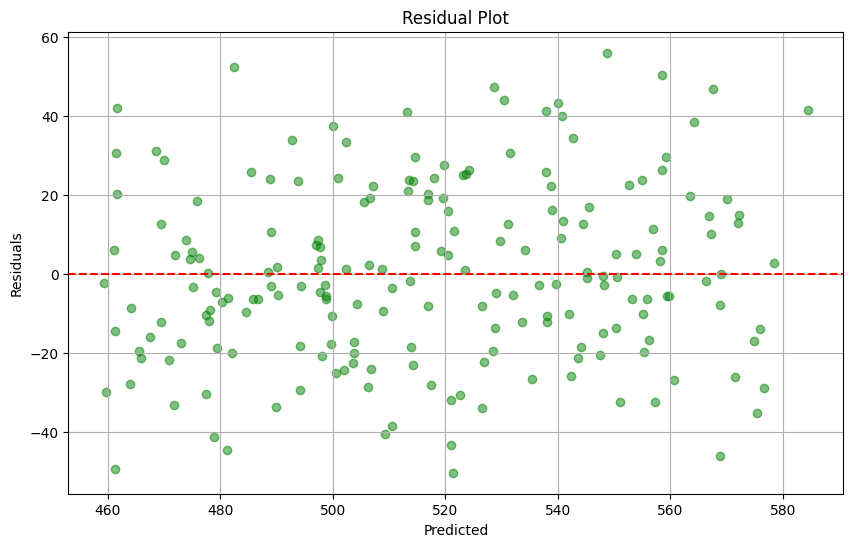

In [92]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Retrieve coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Print the equation of the linear regression model
print("Multi Regression Equation:")
print("y =", end=" ")
for i in range(len(coefficients)):
    print(f"({coefficients[i]:.2f} * X_{i+1}) + ", end="")
print(f"{intercept:.2f}")

# Print performance metrics
print("\nPerformance Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, y_pred, color='red', label='Predicted (line)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('mr1.png')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('mr2.png')
plt.show()


## Multi Regression Model with hyperparameter tuning

Multi Regression Equation:
y = (83833.77 * X_1) + (55126.98 * X_2) + (-0.01 * X_3) + (34.28 * X_4) + (-0.47 * X_5) + 451.31

Performance Metrics:
Mean Squared Error: 507.25377053499346
Root Mean Squared Error: 22.522294965988557
R-squared: 0.7096912088651239


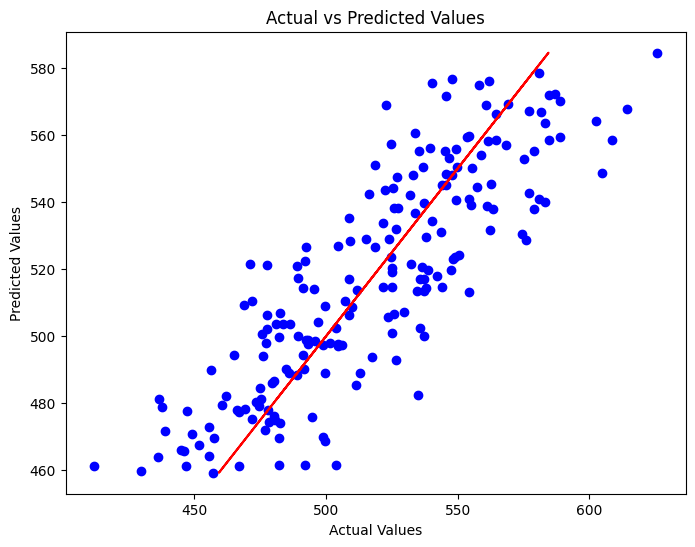

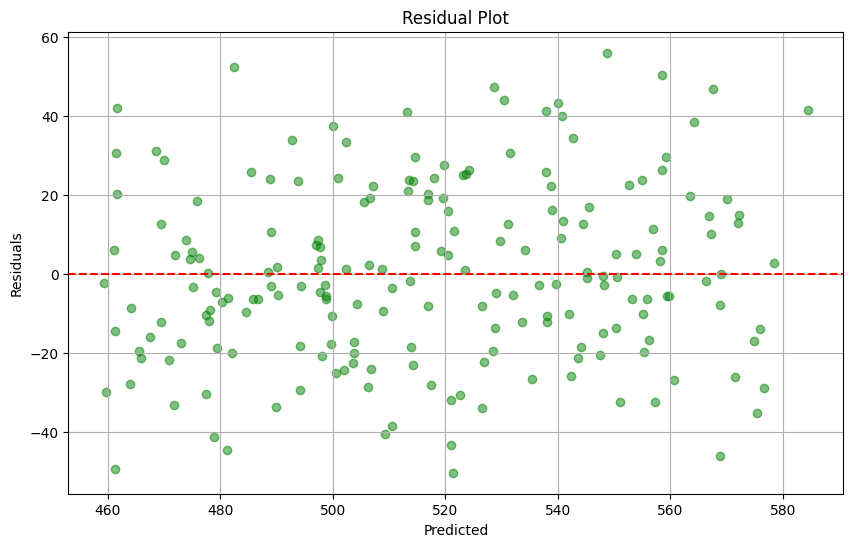

In [93]:
# Define the hyperparameters grid
param_grid = {'fit_intercept': [True, False]}

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Retrieve coefficients and intercept of the best model
coefficients = best_model.coef_
intercept = best_model.intercept_

# Print the equation of the linear regression model
print("Multi Regression Equation:")
print("y =", end=" ")
for i in range(len(coefficients)):
    print(f"({coefficients[i]:.2f} * X_{i+1}) + ", end="")
print(f"{intercept:.2f}")

# Print performance metrics
print("\nPerformance Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, y_pred, color='red', label='Predicted (line)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('mr3.png')
plt.show()


# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('mr4.png')
plt.show()
